   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 

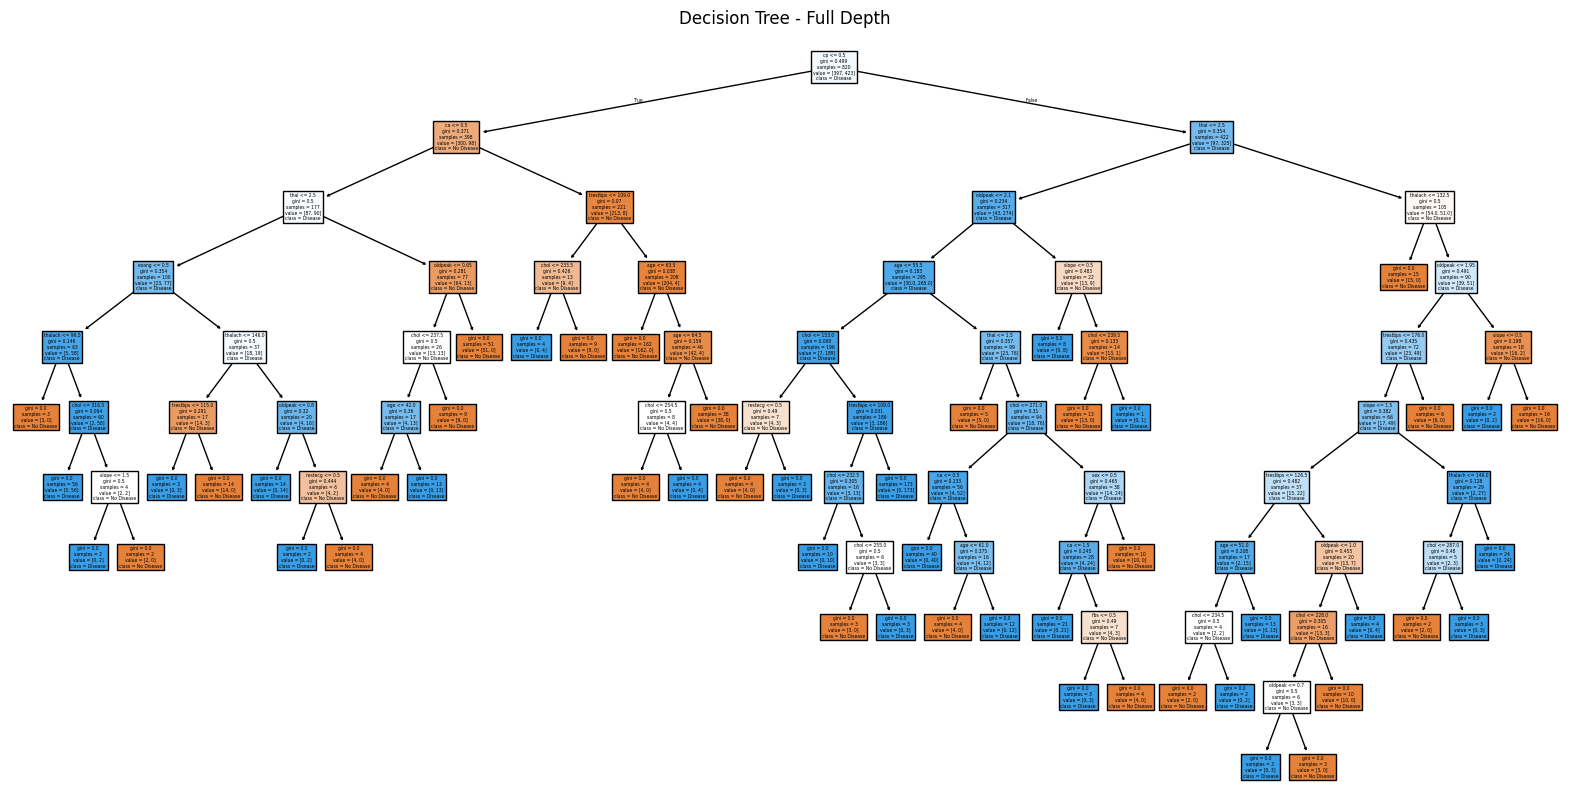

Decision Tree Accuracy (max_depth=3): 0.7804878048780488
Random Forest Accuracy: 0.9853658536585366
Confusion Matrix:
 [[102   0]
 [  3 100]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



C:\Users\smart\AppData\Local\Temp\ipykernel_11180\3815921476.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')


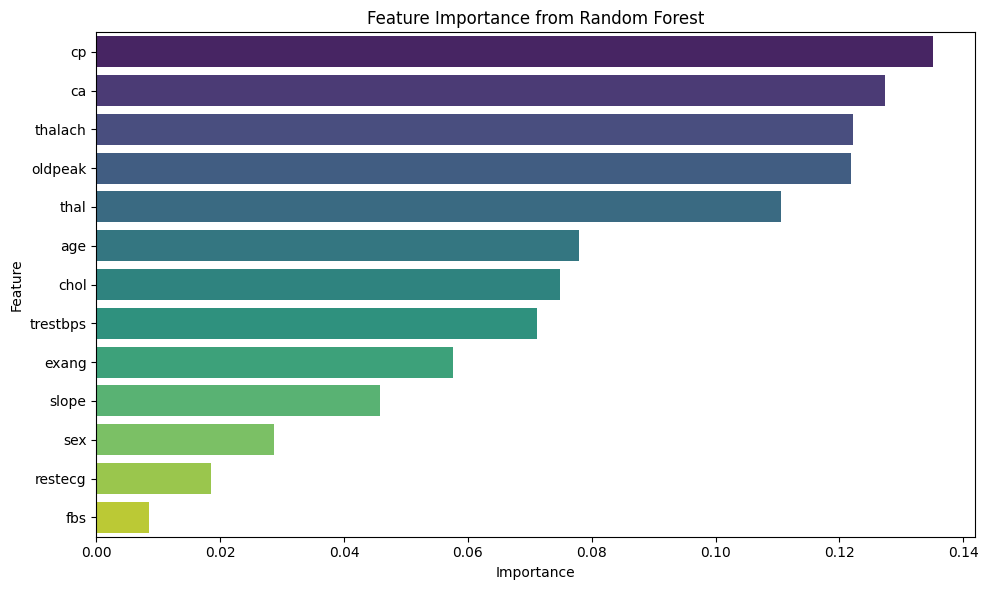

Cross-Validation Scores (10 folds): [1.         1.         1.         1.         1.         1.
 1.         1.         0.97058824 1.        ]
Mean Accuracy: 0.9970588235294118
Standard Deviation: 0.008823529411764707


In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import numpy as np

df = pd.read_csv(r"C:\Users\smart\Downloads\archive (5)\heart.csv",encoding='utf-8')
print(df.head())
print(df.info())
print(df.describe())
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)
plt.figure(figsize=(20, 10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'])
plt.title("Decision Tree - Full Depth")
plt.show()
dt_small = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_small.fit(X_train, y_train)
y_pred_small = dt_small.predict(X_test)
acc_small = accuracy_score(y_test, y_pred_small)
print("Decision Tree Accuracy (max_depth=3):", acc_small)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})


importances = importances.sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
plt.title("Feature Importance from Random Forest")
plt.tight_layout()
plt.show()

cv_scores = cross_val_score(rf_model, X, y, cv=10)


print("Cross-Validation Scores (10 folds):", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print("Standard Deviation:", np.std(cv_scores))





